# Project: Wrangling and Analyze Data

In [1]:
# Import libraries used for data wrangling
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt

import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from bs4 import BeautifulSoup

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
if not os.path.exists('image-predictions.tsv'):
    image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(image_pred_url)
    print(response)

    with open('image-predictions.tsv', mode = 'wb') as file:
        file.write(response.content)

In [4]:
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Below code copied from Udacity example as I do not wish to set up a Twitter account

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

if not os.path.exists('tweet_json.txt'):
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = df_twitter_arch.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
line_json_list = []

file = open('tweet_json.txt', 'r')
lines = file.readlines()

for line in lines:
    line_json = json.loads(line)
    line_json_list.append(line_json)
    
df_tweet_extinfo = pd.DataFrame.from_dict(line_json_list)

df_tweet_extinfo.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
# Explore and assess below using pandas functions like head(), tail(), info(), describe(), value_counts(), unique(), nunique(), query()
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# Sanity check the ratings
# Highest rating 1776/10 was a US national day joke (although all of this may be considered)
# Still, for analysis purpose, it may be prudent to remove outliers where the ratio is either very high or below 1
(df_twitter_arch['rating_numerator']/df_twitter_arch['rating_denominator']).value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        2
7.500000        2
1.500000        2
42.000000       2
0.818182        2
177.600000      1
0.636364        1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
dtype: int64

In [9]:
df_twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
df_tweet_extinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [11]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_image_pred.duplicated().sum()

0

In [13]:
df_twitter_arch.duplicated().sum()

0

In [14]:
df_tweet_extinfo.duplicated(subset='id').sum()

0

In [15]:
df_twitter_arch.duplicated(subset='tweet_id').sum()

0

In [16]:
df_image_pred.duplicated(subset='tweet_id').sum()

0

In [17]:
# Multiple dog types check
dog_types_multiples = df_twitter_arch['doggo'].str.contains('doggo').astype(int) \
    + df_twitter_arch['floofer'].str.contains('floofer').astype(int) \
    + df_twitter_arch['pupper'].str.contains('pupper').astype(int) \
    + df_twitter_arch['puppo'].str.contains('puppo').astype(int) > 1

df_twitter_arch[dog_types_multiples]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [18]:
# Check that rating columns match rating substring in tweet
df_twitter_arch[df_twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

<ipython-input-18-303bbb68250b>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_twitter_arch[df_twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]


,tweet_id,text,rating_numerator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,681340665377193984,I've been told there's a slight possibility he...,5
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26


### Quality issues
1. Data type issues: In `df_twitter_arch`, columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` should not be float type. In `df_twitter_arch` and `df_tweet_extinfo`, `timestamp` and `created_at` should be datetime type.

2. The naming convention of strings in `df_image_pred` colums `p1`, `p2`, `p3` should conform to lower case. Currently, it is mixed and uses underscore instead of white space.

3. In `df_twitter_arch`, the `source` column content may be cleaned up such that the HTML is removed

4. Retweets are not wanted and should be removed from `df_twitter_arch` along with retweet information columns

5. In `df_twitter_arch`, remove tweets without images (no URL in `expanded_urls` column)

6. Strings "None" should be converted to proper Python None

7. In `df_twitter_arch`, dividing `rating_numerator` and `rating_denominator` produces some strange values. Let's keep this ratio between 1.0 and 1.5 for analysis sake as most "serious" ratings are in this range and we are only interested in "good dogs".

8. Some values in `rating_numerator` do not match the values in the actual tweet string due to decimal point numerator in the text

9. In `df_twitter_arch`, it would become easier to understand to analyze the rating if the numerator and denominator ratio was in a column of its own.

10. `df_tweet_extinfo` containts many columns that are clearly not of interest. Some of these have structural issues, but these should anyway be removed.

11. "In reply to" information is not needed in `df_twitter_arch`

12. The tweet identifier columns in `df_twitter_arch` and `df_tweet_extinfo` are named `tweet_id` and `id` respectively. Only one notation of this should be kept.

### Tidiness issues
1. All three dataframed `df_twitter_arch`, `df_image_pred` and `df_tweet_extinfo` contain information pertaining to a specific tweet. The information would probably be easier to work with if this information was merged into a single master dataframe.

2. In `df_twitter_arch`, the columns `dogger`, `floofer`, `pupper`, `puppo` should be consolidated to one column (dog_type) while handling possible multiple dog types

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
df_twitter_arch_clean = df_twitter_arch.copy()
df_image_pred_clean = df_image_pred.copy()
df_tweet_extinfo_clean = df_tweet_extinfo.copy()

### Quality: Information overload in df_tweet_extinfo

#### Define
Remove columns in `df_tweet_extinfo` that are clearly unnecessary using pandas drop() function

#### Code

In [20]:
extinfo_keep_cols = ['id', 'retweet_count', 'favorite_count']
extinfo_drop_cols = list(df_tweet_extinfo_clean.columns)
for item in extinfo_keep_cols:
    extinfo_drop_cols.remove(item)

df_tweet_extinfo_clean = df_tweet_extinfo_clean.drop(columns=extinfo_drop_cols)

#### Test

In [21]:
assert len(df_tweet_extinfo_clean.columns) == len(extinfo_keep_cols)
df_tweet_extinfo_clean.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Quality: "In reply to" information not needed

#### Define
Drop the columns from `df_twitter_arch_clean`

#### Code

In [22]:
if 'in_reply_to_status_id' in df_twitter_arch_clean.columns:
    df_twitter_arch_clean = df_twitter_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [23]:
assert 'in_reply_to_status_id' not in df_twitter_arch_clean.columns

### Quality: Non-uniform column name for tweet ID across dataframes

#### Define
Change column name `id` to `tweet_id` in `df_tweet_extinfo`

#### Code

In [24]:
df_tweet_extinfo_clean = df_tweet_extinfo_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [25]:
assert 'tweet_id' in list(df_tweet_extinfo_clean.columns)
df_tweet_extinfo_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Tidiness: Multiple dog type columns

#### Define
`df_twitter_arch` dog type columns dogger, floofer, pupper, puppo should be merged into one column called dog_type and the "old" individuals columns remove. Take care of multiple dog types.

#### Code

In [26]:
# Initially tried melt function as it was used in the other sourcework but obtained review feedback
# and this seems a much more straight-forward approach

# handle none
df_twitter_arch_clean['doggo'] = df_twitter_arch_clean['doggo'].replace('None', '')
df_twitter_arch_clean['floofer'] = df_twitter_arch_clean['floofer'].replace('None', '')
df_twitter_arch_clean['pupper'] = df_twitter_arch_clean['pupper'].replace('None', '')
df_twitter_arch_clean['puppo'] = df_twitter_arch_clean['puppo'].replace('None', '')

# merge into column
df_twitter_arch_clean['dog_type'] = df_twitter_arch_clean['doggo'] + df_twitter_arch_clean['floofer'] + df_twitter_arch_clean['pupper'] + df_twitter_arch_clean['puppo']

# handle multiple tyoes
df_twitter_arch_clean.loc[df_twitter_arch_clean['dog_type'] == 'doggopupper', 'dog_type'] = 'doggo, pupper'
df_twitter_arch_clean.loc[df_twitter_arch_clean['dog_type'] == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
df_twitter_arch_clean.loc[df_twitter_arch_clean['dog_type'] == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

# handle missing values
df_twitter_arch_clean.loc[df_twitter_arch_clean['dog_type'] == '', 'dog_type'] = np.nan

df_twitter_arch_clean = df_twitter_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [27]:
assert 'dog_type' in df_twitter_arch_clean.columns
for dog_type in ['doggo', 'floofer', 'pupper', 'puppo']:
    assert dog_type not in df_twitter_arch_clean.columns
assert df_twitter_arch_clean.duplicated(subset='tweet_id').sum() == 0
df_twitter_arch_clean['dog_type'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

### Tidiness: Tweet information spread over three dataframes

#### Define
Merge all three dataframes into one "master" dataframe based on `tweet_id`

#### Code

In [28]:
if 'retweet_count' not in df_twitter_arch_clean.columns:
    df_twitter_arch_clean = pd.merge(df_twitter_arch_clean, df_tweet_extinfo_clean, on=['tweet_id'], how='left')
    
if 'jpg_url' not in df_twitter_arch_clean.columns:
    df_twitter_arch_clean = pd.merge(df_twitter_arch_clean, df_image_pred_clean, on=['tweet_id'], how='left')

# Due to a bug in earlier version of pandas, int type is converted to float when performing merge
# Thus, we need to convert it back to int but it requires that there a no null values
# We will remove the few rows (8) that contain null values here so the code doesn't break
# Read more here: https://stackoverflow.com/questions/38444480/how-to-prevent-pandas-from-converting-my-integers-to-floats-when-i-merge-two-dat
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean['favorite_count'].isnull() == False]
df_twitter_arch_clean['retweet_count'] = df_twitter_arch_clean['retweet_count'].astype('int64')
df_twitter_arch_clean['favorite_count'] = df_twitter_arch_clean['favorite_count'].astype('int64')
df_twitter_arch_clean['img_num'] = df_twitter_arch_clean['favorite_count'].astype('int64')

#### Test

In [29]:
assert 'retweet_count' in df_twitter_arch_clean.columns
assert 'jpg_url' in df_twitter_arch_clean.columns
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   timestamp                   2354 non-null   object 
 2   source                      2354 non-null   object 
 3   text                        2354 non-null   object 
 4   retweeted_status_id         179 non-null    float64
 5   retweeted_status_user_id    179 non-null    float64
 6   retweeted_status_timestamp  179 non-null    object 
 7   expanded_urls               2295 non-null   object 
 8   rating_numerator            2354 non-null   int64  
 9   rating_denominator          2354 non-null   int64  
 10  name                        2354 non-null   object 
 11  dog_type                    379 non-null    object 
 12  retweet_count               2354 non-null   int64  
 13  favorite_count              2354 

### Quality: Remove retweets and associated information

#### Define
Retweets are not wanted and should be removed from `df_twitter_arch` along with retweet information columns using drop().

#### Code

In [30]:
# Remove retweet tweets
if 'retweeted_status_id' in df_twitter_arch_clean.columns:
    df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean['retweeted_status_id'].isnull() == True]
    df_twitter_arch_clean = df_twitter_arch_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [31]:
for dog_type in ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']:
    assert dog_type not in df_twitter_arch_clean.columns
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_type            344 non-null    object 
 9   retweet_count       2175 non-null   int64  
 10  favorite_count      2175 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             2175 non-null   int64  
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
 16  p2    

### Quality: Timestamp as datetime

#### Define
Use pandas to_datetime() function to convert `timestamp` column

#### Code

In [32]:
df_twitter_arch_clean['timestamp'] = pd.to_datetime(df_twitter_arch_clean['timestamp'])

#### Test

In [33]:
df_twitter_arch_clean['timestamp'].dtype

datetime64[ns, UTC]

### Quality: Clean up source column

#### Define
Remove HTML tags and define more appropriate source names

#### Code

In [34]:
def clean_text_from_html(html_str):
    return BeautifulSoup(html_str, "lxml").text

df_twitter_arch_clean['source'] = df_twitter_arch_clean['source'].apply(clean_text_from_html)
df_twitter_arch_clean['source'] = df_twitter_arch_clean['source'].replace('Twitter for iPhone', 'iPhone')
df_twitter_arch_clean['source'] = df_twitter_arch_clean['source'].replace('Vine - Make a Scene', 'Vine')
df_twitter_arch_clean['source'] = df_twitter_arch_clean['source'].replace('Twitter Web Client', 'Web Client')

#### Test

In [35]:
df_twitter_arch_clean['source'].value_counts()

iPhone        2042
Vine            91
Web Client      31
TweetDeck       11
Name: source, dtype: int64

### Quality: Replace "None" names with proper NaN

#### Define
Replace names "None" with np.NaN

#### Code

In [36]:
df_twitter_arch_clean['name'] = df_twitter_arch_clean['name'].replace('None', np.NaN)

#### Test

In [37]:
assert len(df_twitter_arch_clean.query('name == "None"')) == 0

### Quality: Naming convention of breed strings

#### Define
Colums `p1`, `p2`, `p3` should conform to lower case. Currently, it is mixed and uses underscore instead of white space.

#### Code

In [38]:
df_twitter_arch_clean['p1'] = df_twitter_arch_clean['p1'].str.lower()
df_twitter_arch_clean['p2'] = df_twitter_arch_clean['p2'].str.lower()
df_twitter_arch_clean['p3'] = df_twitter_arch_clean['p3'].str.lower()
df_twitter_arch_clean['p1'] = df_twitter_arch_clean['p1'].str.replace('_', ' ')
df_twitter_arch_clean['p2'] = df_twitter_arch_clean['p2'].str.replace('_', ' ')
df_twitter_arch_clean['p3'] = df_twitter_arch_clean['p3'].str.replace('_', ' ')

#### Test

In [39]:
df_twitter_arch_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,39467,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,33819,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,25461,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,42908,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,41048,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### Quality: Tweets without images

#### Define
Remove entries without images (`expanded_urls` is NaN)

#### Code

In [40]:
df_twitter_arch_clean = df_twitter_arch_clean[df_twitter_arch_clean['expanded_urls'].isnull() == False]

#### Test

In [41]:
assert df_twitter_arch_clean['expanded_urls'].isnull().sum() == 0

### Quality: Mismatch in rating_numerator due to text decimal points

#### Define
Since this is only a few values, these are fixed case by case below

#### Code

In [42]:
# First, we need to change data type of numerator (and denominator for consistency) to float
df_twitter_arch_clean['rating_numerator'] = df_twitter_arch_clean['rating_numerator'].astype(float)
df_twitter_arch_clean['rating_denominator'] = df_twitter_arch_clean['rating_denominator'].astype(float)

# Update with values found in the tweet texts
df_twitter_arch_clean.at[df_twitter_arch_clean[df_twitter_arch_clean['tweet_id'] == 883482846933004288].index[0], 'rating_numerator'] = 13.5
df_twitter_arch_clean.at[df_twitter_arch_clean[df_twitter_arch_clean['tweet_id'] == 786709082849828864].index[0], 'rating_numerator'] = 9.75
df_twitter_arch_clean.at[df_twitter_arch_clean[df_twitter_arch_clean['tweet_id'] == 778027034220126208].index[0], 'rating_numerator'] = 11.27
df_twitter_arch_clean.at[df_twitter_arch_clean[df_twitter_arch_clean['tweet_id'] == 680494726643068929].index[0], 'rating_numerator'] = 11.26

#### Test

In [43]:
df_twitter_arch_clean[df_twitter_arch_clean['tweet_id'] == 883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
45,883482846933004288,2017-07-08 00:28:19+00:00,iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,NaN,10407,...,46860,golden retriever,0.943082,True,labrador retriever,0.032409,True,kuvasz,0.005501,True


### Quality: Rating ratio in dedicated column

#### Define
Calculate the nominator and denominator rating ratio and put this into a dedicated rating column.

#### Code

In [44]:
df_twitter_arch_clean['rating'] = df_twitter_arch_clean['rating_numerator']/df_twitter_arch_clean['rating_denominator']

#### Test

In [45]:
assert 'rating' in df_twitter_arch_clean.columns
df_twitter_arch_clean['rating'].value_counts()
# 0.0 rating is an NYPD robotic dog...

1.200000      493
1.000000      438
1.100000      423
1.300000      295
0.900000      154
0.800000       98
0.700000       51
1.400000       40
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
1.127000        1
0.975000        1
3.428571        1
1.350000        1
177.600000      1
0.818182        1
0.636364        1
1.126000        1
42.000000       1
Name: rating, dtype: int64

### Quality: Remove rating outliers

#### Define
Remove outliers and invalid data from the ratings

#### Code

In [46]:
df_twitter_arch_clean = df_twitter_arch_clean.query('rating >= 1.0 and rating <= 1.5')

#### Test

In [47]:
assert len(df_twitter_arch_clean.query('rating < 1.0 and rating > 1.5')) == 0
df_twitter_arch_clean['rating'].value_counts()

1.200    493
1.000    438
1.100    423
1.300    295
1.400     40
1.350      1
1.127      1
1.126      1
Name: rating, dtype: int64

### Final notes on cleaning
Some of the quality issues stated initially were taken care of implicitly when deciding to remove or regroup data.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
df_twitter_arch_clean.to_csv('twitter_archive_master.csv', index=False)
assert os.path.exists('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight 1
What are the most common predictions for the first, second and third most probablt predictions?

It seems like labrador retriever and golden retriever turn up at the top for each of the predictions. Curiously cardigan turns up frequently for the second prediction which can be an explainable misclasification.

In [49]:
print(df_twitter_arch_clean['p1'].value_counts())
print(df_twitter_arch_clean['p2'].value_counts())
print(df_twitter_arch_clean['p3'].value_counts())

golden retriever      131
labrador retriever     87
pembroke               83
chihuahua              63
chow                   41
                     ... 
giant panda             1
silky terrier           1
madagascar cat          1
maillot                 1
desktop computer        1
Name: p1, Length: 281, dtype: int64
labrador retriever          91
golden retriever            76
cardigan                    67
pomeranian                  36
chesapeake bay retriever    34
                            ..
confectionery                1
bathing cap                  1
laptop                       1
volcano                      1
english foxhound             1
Name: p2, Length: 313, dtype: int64
labrador retriever    66
chihuahua             46
golden retriever      43
eskimo dog            32
kelpie                31
                      ..
tiger cat              1
rapeseed               1
refrigerator           1
croquet ball           1
power drill            1
Name: p3, Length: 323, dty

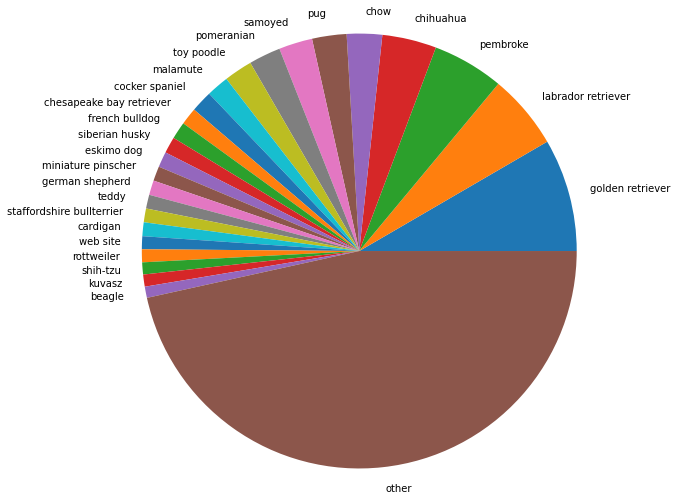

In [50]:
list_top_25_labels = list(df_twitter_arch_clean['p1'].value_counts().index[:25])
list_top_25_labels.append("other")

list_top_25_values = list(df_twitter_arch_clean['p1'].value_counts().values[0:25])
list_top_25_values.append(df_twitter_arch_clean['p1'].value_counts().values[26:len(df_twitter_arch_clean['p1'].value_counts())-1].sum())

plt.pie(list_top_25_values, labels=list_top_25_labels, radius=2.5);

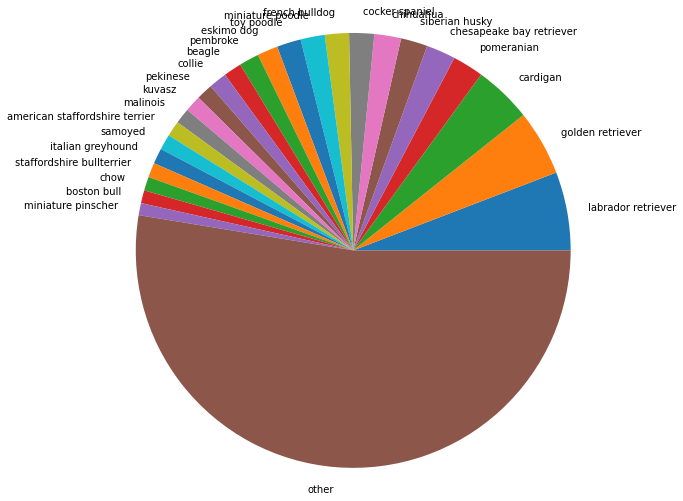

In [51]:
list_top_25_labels = list(df_twitter_arch_clean['p2'].value_counts().index[:25])
list_top_25_labels.append("other")

list_top_25_values = list(df_twitter_arch_clean['p2'].value_counts().values[0:25])
list_top_25_values.append(df_twitter_arch_clean['p2'].value_counts().values[26:len(df_twitter_arch_clean['p2'].value_counts())-1].sum())

plt.pie(list_top_25_values, labels=list_top_25_labels, radius=2.5);

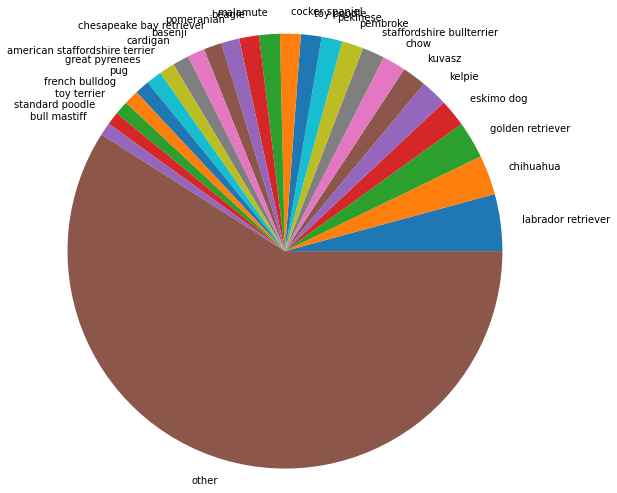

In [52]:
list_top_25_labels = list(df_twitter_arch_clean['p3'].value_counts().index[:25])
list_top_25_labels.append("other")

list_top_25_values = list(df_twitter_arch_clean['p3'].value_counts().values[0:25])
list_top_25_values.append(df_twitter_arch_clean['p3'].value_counts().values[26:len(df_twitter_arch_clean['p3'].value_counts())-1].sum())

plt.pie(list_top_25_values, labels=list_top_25_labels, radius=2.5);

### Insight 2
Show ratio of tweets from Iphone, Web client, Vine and TweetDeck sources.

The vast majority of the tweets seems to be originating from the iPhone app.

In [53]:
df_twitter_arch_clean['source'].value_counts()/len(df_twitter_arch_clean)

iPhone        0.933806
Vine          0.049645
Web Client    0.011229
TweetDeck     0.005319
Name: source, dtype: float64

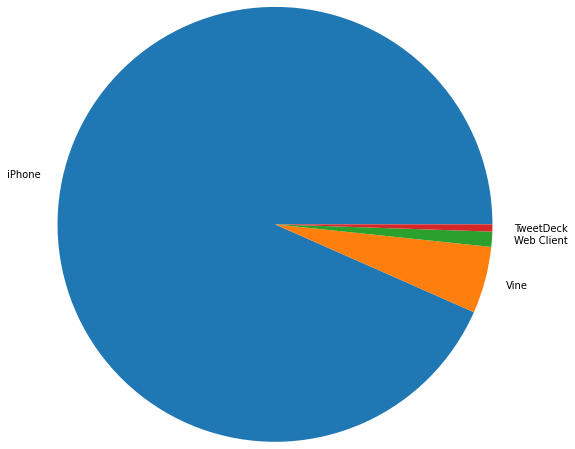

In [54]:
plt.pie(df_twitter_arch_clean['source'].value_counts(), labels=['iPhone', 'Vine', 'Web Client', 'TweetDeck'], radius=2.5);

### Insight 3
Categorize which dog types lead to the most average retweets (doggo, floofer, pupper, puppo)

Doggo and Puppo dog types seem to create most retweets on average.

In [55]:
df_twitter_arch_clean.groupby('dog_type', as_index=False).mean()

,dog_type,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
0,doggo,7.974492e+17,12.014493,10.0,6805.942029,18554.550725,18554.550725,0.583922,0.152902,0.061891,1.201449
1,"doggo, floofer",8.540102e+17,11.000000,10.0,3433.000000,17169.000000,17169.000000,0.354733,0.177538,0.131706,1.100000
2,"doggo, pupper",7.811314e+17,11.777778,10.0,4271.888889,12880.222222,12880.222222,0.829150,0.085802,0.029641,1.177778
3,"doggo, puppo",8.558515e+17,13.000000,10.0,19196.000000,47844.000000,47844.000000,0.321676,0.115138,0.096100,1.300000
4,floofer,7.558218e+17,11.888889,10.0,4155.888889,11064.444444,11064.444444,0.609204,0.155319,0.047997,1.188889
5,pupper,7.245568e+17,11.329344,10.0,2720.890710,7990.595628,7990.595628,0.619129,0.131351,0.056702,1.132934
6,puppo,8.107776e+17,12.136364,10.0,6867.500000,22456.454545,22456.454545,0.736331,0.134950,0.039388,1.213636


<BarContainer object of 4 artists>

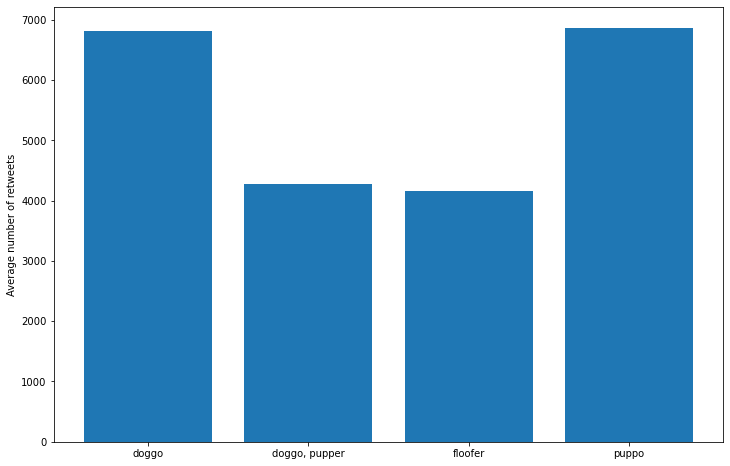

In [56]:
retweet_means = list(df_twitter_arch_clean.groupby('dog_type', as_index=False).mean()['retweet_count'])
dog_types = list(df_twitter_arch_clean.groupby('dog_type', as_index=False).mean()['dog_type'])

# Remove the combined dog types from the visualiation as there are very few occurances of these (not deemed significant)
del dog_types[1]
del dog_types[2]
del dog_types[3]
del retweet_means[1]
del retweet_means[2]
del retweet_means[3]

f, ax = plt.subplots(figsize=(12,8))
plt.ylabel('Average number of retweets')
plt.bar(dog_types, retweet_means)